### Importación de datos



In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
from matplotlib import pyplot as plt

#1. Análisis de facturación



In [ ]:
#enlistar las tiendas para manipular como un iterable
tiendas = [tienda1, tienda2, tienda3, tienda4]

#obtener la facturación total de las 4 tiendas
facturacion = [sum(tiendas[i]['Precio']) for i in range(len(tiendas))]
#hacer un diccionario tienda:facturacion
ingresos = {'tienda ' + str(facturacion.index(elemento)+1) : elemento for elemento in facturacion}
#organizar como lista de tuplas en orden descendente con respecto a los ingresos
facturacion_ordenada = sorted(ingresos.items(), key=lambda item: item[1], reverse=True)

In [ ]:
print(f'La facturación por tienda de mayor a menor es:\n{facturacion_ordenada}')

#obtener el índice para identificar cada tienda
print(f'\nLa tienda {facturacion.index(max(facturacion))+1} tiene la facturación mayor: ${max(facturacion)}\nla tienda {facturacion.index(min(facturacion))+1} tiene la facturación menor: ${min(facturacion)}')
print(f'La diferencia entre ellas es de: ${max(facturacion) - min(facturacion)}')

La facturación por tienda de mayor a menor es:
[('tienda 1', 1150880400.0), ('tienda 2', 1116343500.0), ('tienda 3', 1098019600.0), ('tienda 4', 1038375700.0)]

La tienda 1 tiene la facturación mayor: $1150880400.0
la tienda 4 tiene la facturación menor: $1038375700.0
La diferencia entre ellas es de: $112504700.0


# 2. Ventas por categoría

In [ ]:
# Agrupar las categorías sin repetición de valor en cada tienda
categorias_unicas = [list(set(tiendas[i]['Categoría del Producto'])) for i in range(len(tiendas))]
#asignar las categorías correspondientes a cada tienda
sucursal1, sucursal2, sucursal3, sucursal4 = categorias_unicas
#unificar todas las categorías en una sola lista
unicas = list(set(sucursal1 + sucursal2 + sucursal3 + sucursal4))

#crear las 4 listas con categorias repetidas de cada tienda
categorias_repetidas = [list(tiendas[m]['Categoría del Producto']) for m in range(len(tiendas))]

In [ ]:
#crear una lista de listas con valores repetidos de cada tienda
for sublista in categorias_repetidas:
    lista_de_listas = []
    for categoria in unicas:
        lista = [c for c in sublista if c == categoria]
        lista_de_listas.append(lista)
    print(f'Venta por categoría de la tienda {categorias_repetidas.index(sublista)+1} de mayor a menor:')
    #print(lista_de_listas)
    #Creando un diccionario categoria:cantidad de elementos
    conteo_valores = {unicas[i]: len(lista_de_listas[i]) for i in range(len(unicas))}
    #print(f'{conteo_valores}\nDe mayor a menor:\n')
    print(f'{dict(sorted(conteo_valores.items(), key=lambda item: item[1], reverse=True))}\n')

Venta por categoría de la tienda 1 de mayor a menor:
{'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}

Venta por categoría de la tienda 2 de mayor a menor:
{'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}

Venta por categoría de la tienda 3 de mayor a menor:
{'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Artículos para el hogar': 177, 'Instrumentos musicales': 177}

Venta por categoría de la tienda 4 de mayor a menor:
{'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}



# 3. Calificación promedio de la tienda

In [ ]:
#obtener el promedio de satisfacción de cada tienda
media_aprobacion = [sum(tiendas[i]['Calificación'])/len(tiendas[i]['Calificación']) for i in range(len(tiendas))]
#hacer un diccionario tienda:calificacion
aprobacion = {'tienda ' + str(media_aprobacion.index(j)+1) : j for j in media_aprobacion}
#organizar como lista de tuplas en orden descendente con respecto a la calificación
aprobacion_ordenada = sorted(aprobacion.items(), key=lambda item: item[1], reverse=True)

In [ ]:
print(f'La calificación por tienda de mayor a menor es:\n{aprobacion_ordenada}')

#obtener el índice para identificar cada tienda
print(f'\nLa tienda {media_aprobacion.index(max(media_aprobacion))+1} tiene la calificación mayor: {max(media_aprobacion):.2f}\nla tienda {media_aprobacion.index(min(media_aprobacion))+1} tiene la calificación menor: {min(media_aprobacion):.2f}')

La calificación por tienda de mayor a menor es:
[('tienda 3', 4.048325561678677), ('tienda 2', 4.037303942348453), ('tienda 4', 3.9957591178965224), ('tienda 1', 3.976685036032217)]

La tienda 3 tiene la calificación mayor: 4.05
la tienda 1 tiene la calificación menor: 3.98


# 4. Productos más y menos vendidos

In [ ]:
#Agrupar los productos sin repetición de valor en cada tienda
productos_unicos = [list(set(tiendas[i]['Producto'])) for i in range(len(tiendas))]
#asignar los productos correspondientes a cada tienda
p_venta1, p_venta2, p_venta3, p_venta4 = productos_unicos
#unificar todas los productos diferentes sin repetición en una sola lista
productos = list(set(p_venta1 + p_venta2 + p_venta3 + p_venta4))

#crear las 4 listas con cada aparición del producto por tienda
productos_repetidos = [list(tiendas[n]['Producto']) for n in range(len(tiendas))]

In [ ]:
#crear una lista de listas con valores repetidos de cada tienda
for elemento in productos_repetidos:
    lista_de_listasp = []
    for prod in productos:
        listap = [p for p in elemento if p == prod]
        lista_de_listasp.append(listap)
    print(f'Venta por producto por pieza de la tienda {productos_repetidos.index(elemento)+1} de mayor a menor:')
    #Crear un diccionario producto:piezas vendidas
    conteo_productos = {productos[i]: len(lista_de_listasp[i]) for i in range(len(productos))}
    print(f'{dict(sorted(conteo_productos.items(), key=lambda item: item[1], reverse=True))}')
    print(f'El producto más vendido por pieza es: {[key for key, value in conteo_productos.items() if value == max(conteo_productos.values())]}')
    print(f'El producto menos vendido por pieza es: {[key for key, value in conteo_productos.items() if value == min(conteo_productos.values())]}\n')

Venta por producto por pieza de la tienda 1 de mayor a menor:
{'Microondas': 60, 'TV LED UHD 4K': 60, 'Armario': 60, 'Secadora de ropa': 58, 'Mesa de noche': 56, 'Bloques de construcción': 56, 'Balón de baloncesto': 55, 'Impresora': 54, 'Refrigerador': 54, 'Bicicleta': 54, 'Vaso térmico': 54, 'Batería': 53, 'Cubertería': 52, 'Carrito de control remoto': 52, 'Modelado predictivo': 51, 'Auriculares': 50, 'Ajedrez de madera': 49, 'Iphone 15': 49, 'Lavavajillas': 48, 'Lavadora de ropa': 47, 'Guitarra eléctrica': 47, 'Guitarra acústica': 46, 'Silla de oficina': 46, 'Sofá reclinable': 46, 'Estufa': 45, 'Cama king': 44, 'Mesa de centro': 44, 'Smart TV': 44, 'Cama box': 44, 'Cubo mágico 8x8': 44, 'Kit de bancas': 44, 'Juego de mesa': 43, 'Smartwatch': 43, 'Set de ollas': 43, 'Balón de voleibol': 42, 'Dashboards con Power BI': 42, 'Tablet ABXY': 42, 'Set de vasos': 41, 'Iniciando en programación': 41, 'Sillón': 41, 'Mesa de comedor': 40, 'Muñeca bebé': 40, 'Cuerda para saltar': 40, 'Asistente v

# 5. Envío promedio por tienda

In [ ]:
#obtener el promedio del costo de envío de cada tienda
media_envio = [sum(tiendas[k]['Costo de envío'])/len(tiendas[k]['Costo de envío']) for k in range(len(tiendas))]
#hacer un diccionario tienda:costo_envio
envio = {'tienda ' + str(media_envio.index(l)+1) : l for l in media_envio}
#organizar como lista de tuplas en orden descendente con respecto al costo de envío
envio_ordenada = sorted(envio.items(), key=lambda item: item[1], reverse=True)

In [ ]:

print(f'El costo promedio de envío por tienda de mayor a menor es:\n{envio_ordenada}')

#obtener el índice para identificar cada tienda
print(f'\nLa tienda {media_envio.index(max(media_envio))+1} tiene el costo promedio mayor: ${max(media_envio):.2f}\nla tienda {media_envio.index(min(media_envio))+1} tiene el costo promedio menor: ${min(media_envio):.2f}')

El costo promedio de envío por tienda de mayor a menor es:
[('tienda 1', 26018.60958033065), ('tienda 2', 25216.235693090293), ('tienda 3', 24805.680373039424), ('tienda 4', 23459.457167090754)]

La tienda 1 tiene el costo promedio mayor: $26018.61
la tienda 4 tiene el costo promedio menor: $23459.46


# Visualización

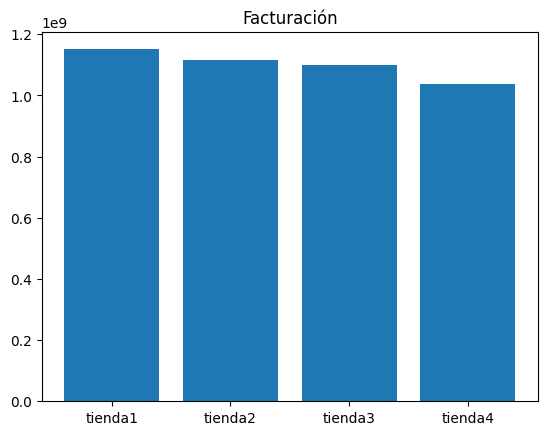

In [ ]:
tiendas_ = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
plt.bar(x=tiendas_, height=facturacion)
plt.title('Facturación')
plt.show()

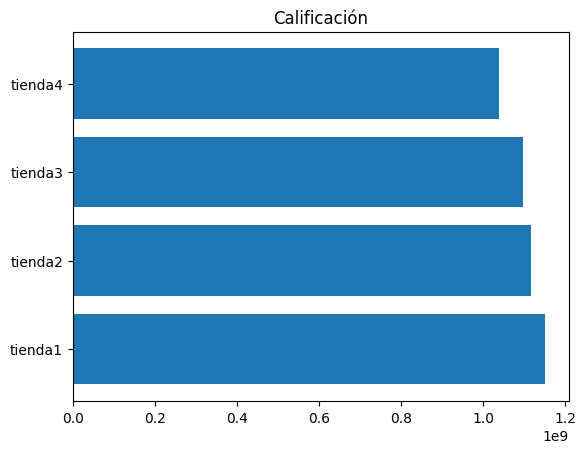

In [ ]:
tiendas_ = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
plt.barh(y=tiendas_, width=facturacion)
plt.title('Calificación')
plt.show()

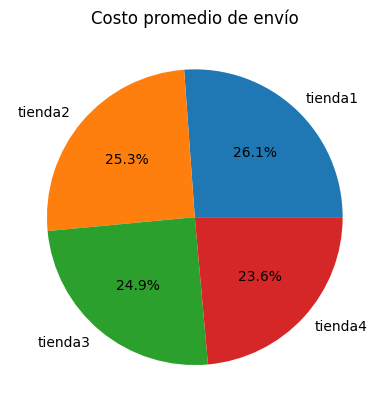

In [ ]:
tiendas_ = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
plt.pie(media_envio, labels=tiendas_, autopct = '%1.1f%%')
plt.title('Costo promedio de envío')
plt.show()

# Informe final

-
La tienda menos productiva es la número 4 con una facturación de 1150880400.0; la tienda más productiva es la tienda número 1 con una facturación de 1038375700.0, lo que representa una diferencia de $112504700.0

- Las categorías más populares en las 4 tiendas son: muebles, electrónicos y juguetes. La tienda 4 se encuentra entre las de mayor volumen de venta de unidades de estas categorías, sin embargo con la facturación más baja lo que permite deducir que dichas unidades, así como la nota de venta, son de costo bajo.

-Los productos más vendidos en la tienda 4 son de costo bajo, como box de cama y cubertería

- La tienda mejor calificada es la número 3 con 4.05; la tienda con la calificación más baja es la tienda 1 con 3.98

- La tienda l tiene el costo de envío promedio mayor: 26018.61; la tienda 4 tiene el costo de envío promedio menor: $23459.46

Con base en lo cual vender la tienda 4 es la mejor opción para el señor Juan, asimismo sería muy recomendable identificar los puntos de dolor de la clientela de la tienda 1 para aumentar el nivel de satisfacción y potenciar el ingreso de esa sucursal.